# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier


---
## Step 0: Load The Data

In [14]:
# Load pickled data
import pickle

training_file = "train.p"
validation_file="valid.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image.

### Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [15]:
import numpy
# Number of training examples
n_train = len(train['features'])

# Number of validation examples
n_validation = len(valid['features'])

# Number of testing examples.
n_test = len(test['features'])

# What's the shape of an traffic sign image?
image_shape = train['features'].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(numpy.unique(train['labels']))

print("Number of training samples =", n_train)
print("Number of validation samples = ", n_validation)
print("Number of testing samples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training samples = 34799
Number of validation samples =  4410
Number of testing samples = 12630
Image data shape = (34799, 32, 32, 3)
Number of classes = 43


### Exploratory visualization of the dataset

In [1]:
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

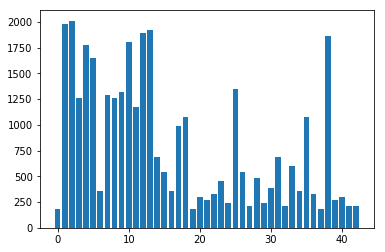

In [106]:
unique, counts = numpy.unique(train['labels'], return_counts=True)
plt.bar(unique, counts)
plt.savefig('distribution.png', bbox_inches='tight')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

### Pre-process the Data Set

In [34]:
# One-hot encoding
from keras.utils.np_utils import to_categorical

oneHotTrain = to_categorical(y_train, num_classes=43)
oneHotValid = to_categorical(y_valid, num_classes=43)
oneHotTest = to_categorical(y_test, num_classes=43)

In [35]:
#reassign
y_train = oneHotTrain
y_valid = oneHotValid
y_test = oneHotTest

In [36]:

# Convert to grayscale
X_trainGray = numpy.sum(X_train/3, axis=3, keepdims=True)
X_testGray = numpy.sum(X_test/3, axis=3, keepdims=True)
X_validGray = numpy.sum(X_valid/3, axis=3, keepdims=True)

# Center and Normalize
X_trainNorm = (X_trainGray - 128)/128 
X_testNorm = (X_testGray - 128)/128
X_validNorm = (X_validGray - 128)/128

#reassign
X_train = X_trainNorm
X_test = X_testNorm
X_valid = X_validNorm

In [1]:
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [2]:
trainGenerator=image.ImageDataGenerator(
        shear_range=0.2, zoom_range=0.2,
        rotation_range=5)

### Model Architecture

In [3]:
model = Sequential()
model.add(Conv2D(8, 3, padding='same', input_shape=(32,32,1), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(64))
model.add(Dropout(.25))
model.add(Dense(64))
model.add(Dropout(.25))
model.add(Dense(43))
model.add(Activation('softmax'))

model.summary()
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 16)        1168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          4640      
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                131136    
__________

### Train, Validate and Test the Model

In [183]:
checkpointer = ModelCheckpoint(filepath='weights/model4.hdf5', verbose=1, save_best_only=True)

model.fit_generator(trainGenerator.flow(X_train, y_train, batch_size=20),
                    steps_per_epoch=len(X_train) / 20, epochs=20,
                    validation_data=(X_valid, y_valid), callbacks=[checkpointer], verbose=1)

Epoch 1/20
1740/1739 [==============================] - 33s 19ms/step - loss: 1.4116 - acc: 0.6015 - val_loss: 0.4754 - val_acc: 0.8694
Epoch 2/20
1740/1739 [==============================] - 29s 17ms/step - loss: 0.4799 - acc: 0.8547 - val_loss: 0.3167 - val_acc: 0.8946
Epoch 3/20
1740/1739 [==============================] - 31s 18ms/step - loss: 0.3260 - acc: 0.9026 - val_loss: 0.2743 - val_acc: 0.9293
Epoch 4/20
1740/1739 [==============================] - 32s 19ms/step - loss: 0.2591 - acc: 0.9204 - val_loss: 0.2783 - val_acc: 0.9295
Epoch 5/20
1740/1739 [==============================] - 31s 18ms/step - loss: 0.2209 - acc: 0.9323 - val_loss: 0.2475 - val_acc: 0.9424
Epoch 6/20
1740/1739 [==============================] - 31s 18ms/step - loss: 0.1990 - acc: 0.9393 - val_loss: 0.2228 - val_acc: 0.9431
Epoch 7/20
1740/1739 [==============================] - 32s 18ms/step - loss: 0.1791 - acc: 0.9455 - val_loss: 0.3010 - val_acc: 0.9211
Epoch 8/20
1740/1739 [==========================

In [37]:
model.load_weights('weights/model4.hdf5')
score = model.evaluate(X_test, y_test, batch_size = 20)
print("test loss: ", score[0])
print("test acc: ", score[1])

12630/12630 [==============================] - 8s 656us/step
test loss:  0.201709056157
test acc:  0.950197933877
